# Best Streaming Service Analysis

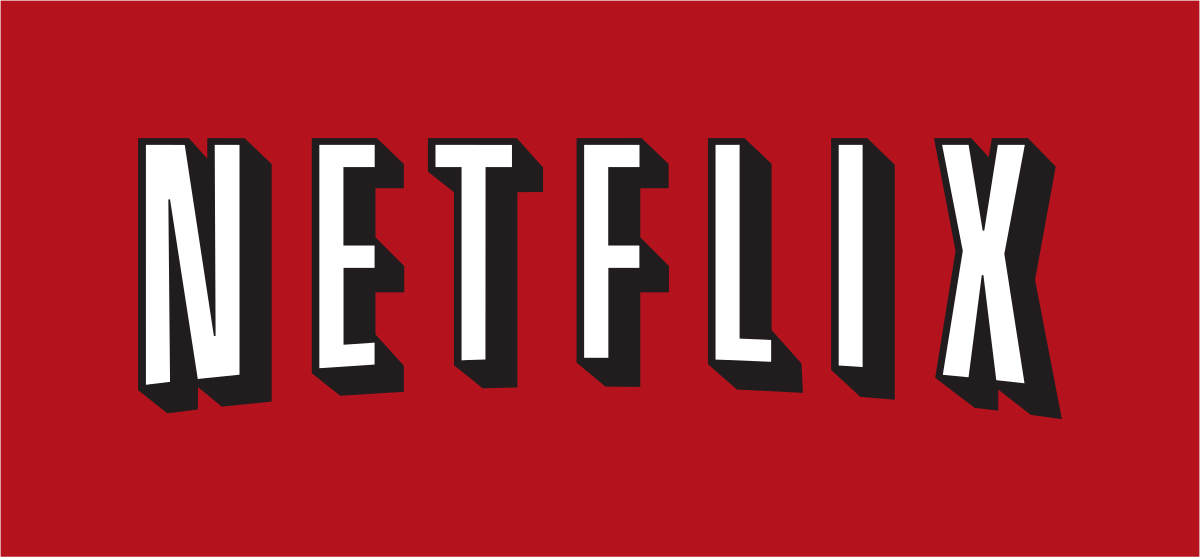

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
data = pd.read_csv('/content/moviestreams.csv')

In [120]:
data.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13.0,8.8,87.0,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18.0,8.7,87.0,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13.0,8.5,84.0,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7.0,8.5,96.0,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18.0,8.8,97.0,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [37]:
data.shape

(16744, 17)

In [38]:
cols = data.columns.tolist()
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [161]:
data.drop(['Unnamed: 0','ID'],axis=1,inplace = True) 

In [162]:
cols = data.columns.tolist()
cols

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [163]:
data_num_cols = data.select_dtypes(include=np.number)
data_num_cols

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
0,2010,8.8,1,0,0,0,0,148.0
1,1999,8.7,1,0,0,0,0,136.0
2,2018,8.5,1,0,0,0,0,149.0
3,1985,8.5,1,0,0,0,0,116.0
4,1966,8.8,1,0,1,0,0,161.0
...,...,...,...,...,...,...,...,...
16739,1980,6.2,0,0,0,1,0,120.0
16740,2001,4.7,0,0,0,1,0,90.0
16741,2013,5.7,0,0,0,1,0,NaN
16742,2017,6.6,0,0,0,1,0,NaN


In [164]:
isnu=data.isnull().sum()
isnu/len(data)*100

Title               0.000000
Year                0.000000
Age                56.079790
IMDb                3.410177
Rotten Tomatoes    69.194935
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
Type                0.000000
Directors           4.335882
Genres              1.642379
Country             2.597946
Language            3.577401
Runtime             3.535595
dtype: float64

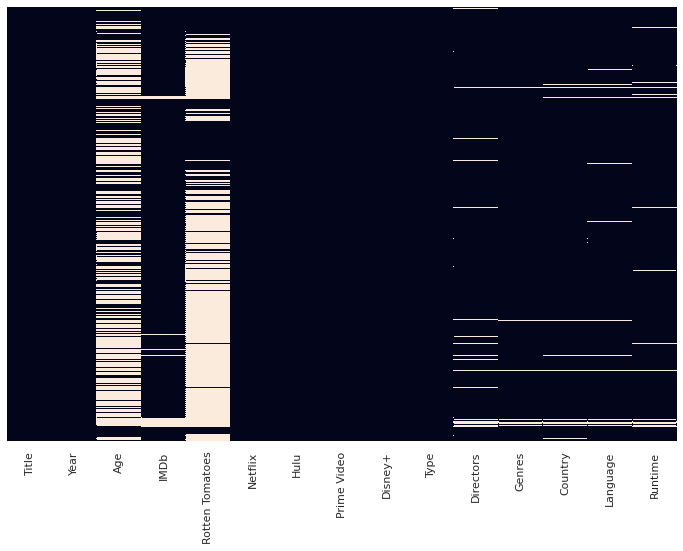

In [165]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),yticklabels=False,cbar = False);

In [166]:
data['Age'].value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

In [167]:
age_map = {'18+':18,'7+':7,'13+':13,'all':0,'16+':16}
data['Age'] = data['Age'].map(age_map)
data[['Age']]

,Age
0,13.0
1,18.0
2,13.0
3,7.0
4,18.0
...,...
16739,NaN
16740,7.0
16741,NaN
16742,NaN


In [168]:
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].str.replace('%','')
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].astype('float64')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   float64
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   float64
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(4

# Visualizations

In [54]:
data.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13.0,8.8,87.0,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18.0,8.7,87.0,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13.0,8.5,84.0,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7.0,8.5,96.0,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18.0,8.8,97.0,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [57]:
data['Language'].value_counts().head(10)

English            10955
Hindi                503
English,Spanish      276
Spanish              267
English,French       174
Italian              166
French               163
Japanese             155
Mandarin             151
Tamil                 93
Name: Language, dtype: int64

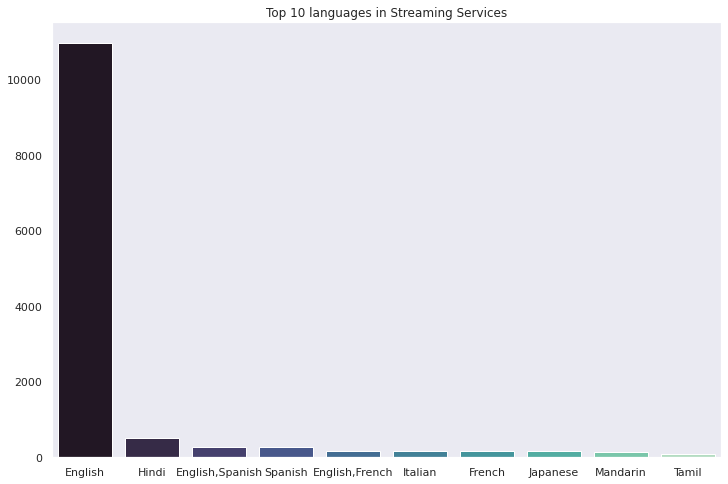

In [96]:
sns.set(style='dark')
langue = data['Language'].value_counts().head(10)
plt.figure(figsize=(12,8))
plt.title('Top 10 languages in Streaming Services')
sns.barplot(x=langue.index,y=langue.values,palette = "mako");

In [89]:
langue.index

Index(['English', 'Hindi', 'English,Spanish', 'Spanish', 'English,French',
       'Italian', 'French', 'Japanese', 'Mandarin', 'Tamil'],
      dtype='object')

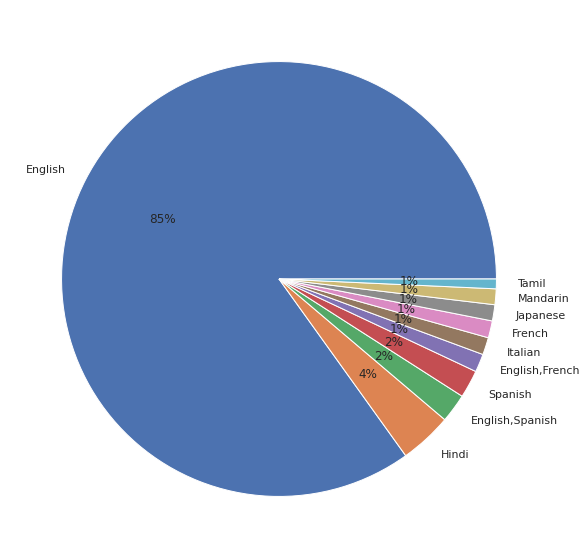

In [98]:
plt.figure(figsize=(30,10))
plt.pie(langue.values, labels=langue.index,autopct='%.0f%%')
plt.show()

In [91]:
data['Age'].value_counts()

18.0    3474
7.0     1462
13.0    1255
0.0      843
16.0     320
Name: Age, dtype: int64

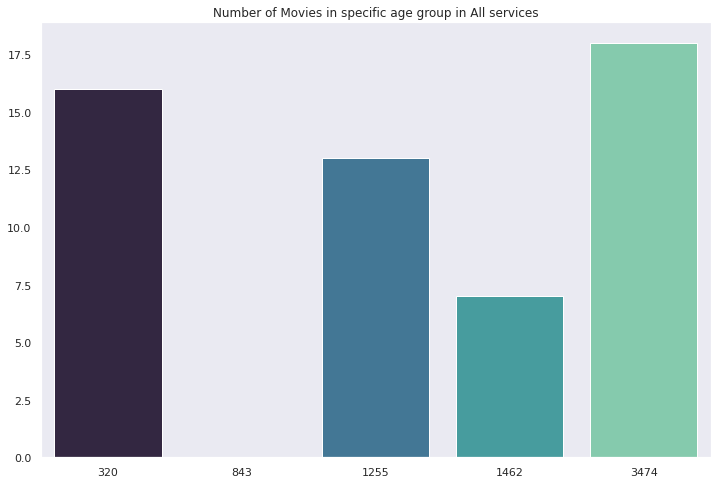

In [99]:
age_sum = data['Age'].value_counts()
plt.figure(figsize=(12,8))
plt.title('Number of Movies in specific age group in All services')
sns.barplot(x=age_sum.values,y=age_sum.index,palette = "mako")

In [93]:
data.loc[data['Netflix']==1]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13.0,8.8,87.0,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18.0,8.7,87.0,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13.0,8.5,84.0,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7.0,8.5,96.0,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18.0,8.8,97.0,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Krish Trish and Baltiboy I,2009,NaN,NaN,NaN,1,0,0,0,0,Tilak Shetty,Animation,India,"Hindi,English",65.0
3556,ChuChuTV Bedtime Stories & Moral Stories for K...,2019,NaN,NaN,NaN,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3557,Elles étaient en guerre 1939-1945,2015,NaN,NaN,NaN,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3558,Shikari,1991,NaN,NaN,NaN,1,0,0,0,0,"Joydip Mukherjee,Zakir Hossain","Action,Crime,Drama,Romance","Bangladesh,India",Bengali,145.0


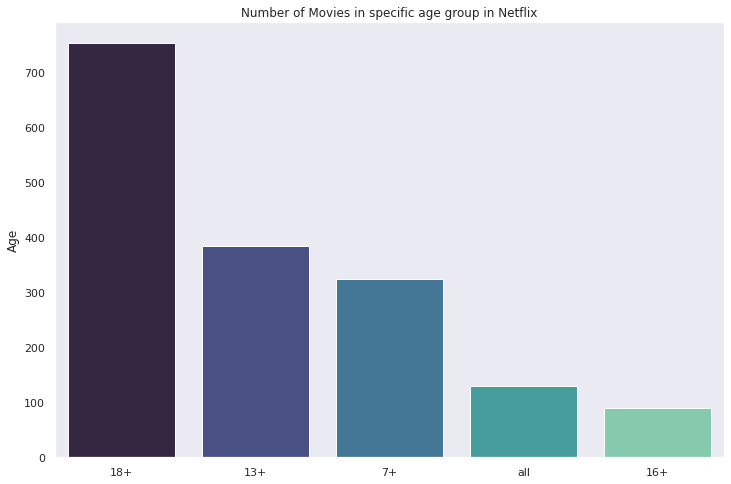

In [131]:
netflix_data = data.loc[data['Netflix']==1]
plt.figure(figsize=(12,8))
plt.title('Number of Movies in specific age group in Netflix')
sns.barplot(x=netflix_data['Age'].value_counts().index,y=netflix_data['Age'].value_counts(),palette = "mako")

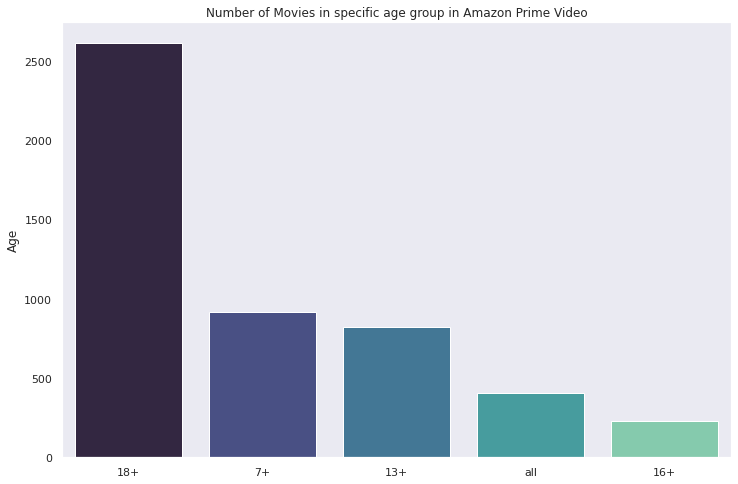

In [138]:
prime_data = data.loc[data['Prime Video']==1]
plt.figure(figsize=(12,8))
plt.title('Number of Movies in specific age group in Amazon Prime Video')
sns.barplot(x=prime_data['Age'].value_counts().index,y=prime_data['Age'].value_counts(),palette = "mako")

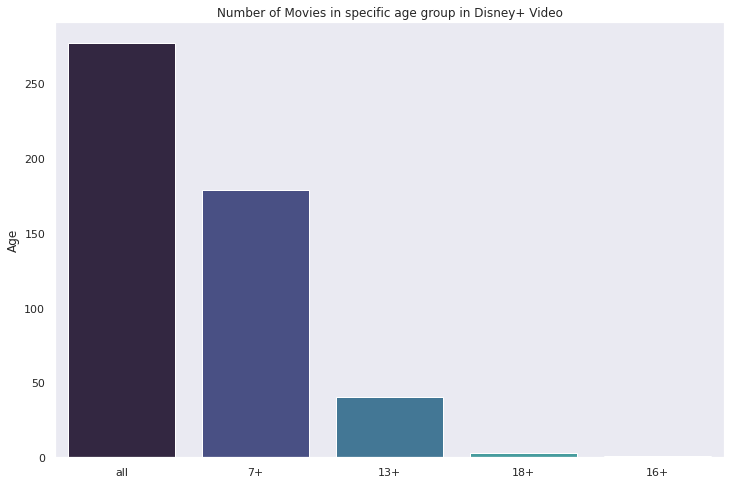

In [137]:
disney_data = data.loc[data['Disney+']==1]
plt.figure(figsize=(12,8))
plt.title('Number of Movies in specific age group in Disney+ Video')
sns.barplot(x=disney_data['Age'].value_counts().index,y=disney_data['Age'].value_counts(),palette = "mako")

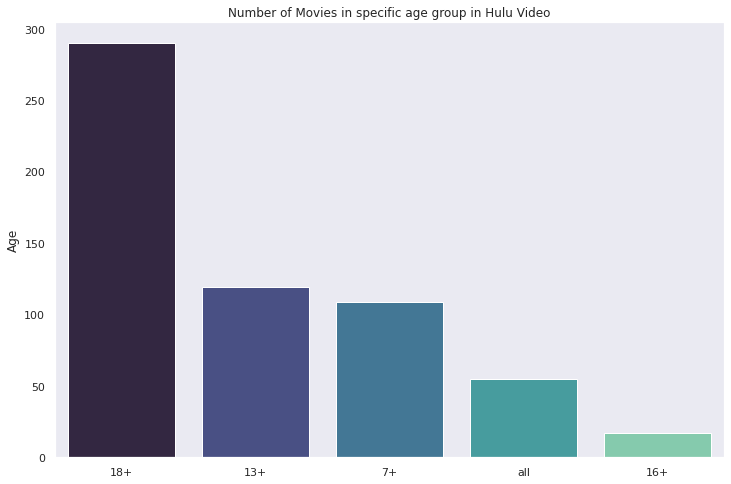

In [136]:
hulu_data = data.loc[data['Hulu']==1]
plt.figure(figsize=(12,8))
plt.title('Number of Movies in specific age group in Hulu Video')
sns.barplot(x=hulu_data['Age'].value_counts().index,y=hulu_data['Age'].value_counts(),palette = "mako")

In [112]:
data['Rotten Tomatoes'].value_counts()

100.0    407
80.0     162
50.0     136
83.0     131
67.0     126
        ... 
28.0      10
7.0       10
4.0        9
3.0        4
2.0        4
Name: Rotten Tomatoes, Length: 99, dtype: int64

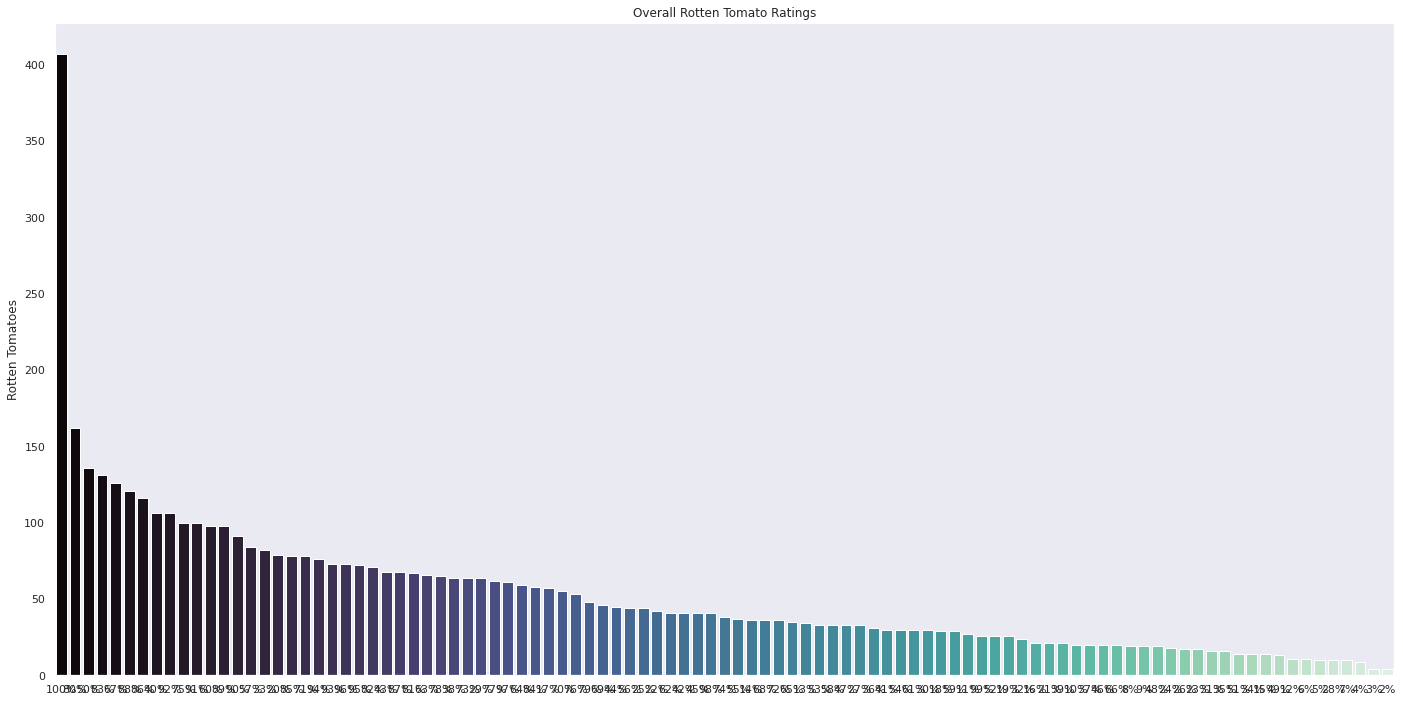

In [130]:
plt.figure(figsize=(24,12))
plt.title('Overall Rotten Tomato Ratings')
sns.barplot(x=data['Rotten Tomatoes'].value_counts().index ,y=data['Rotten Tomatoes'].value_counts(),palette='mako',)

In [139]:
rt_score = pd.DataFrame({'Streaming Service':["Prime Video", "Hulu","Disney+","NetFlix"],
                         'Rotten Tomato Score':[netflix_data['Rotten Tomatoes'].value_counts()[0],
                                               prime_data['Rotten Tomatoes'].value_counts()[0],
                                               disney_data['Rotten Tomatoes'].value_counts()[0],
                                               hulu_data['Rotten Tomatoes'].value_counts()[0]]})

In [140]:
rt_score

,Streaming Service,Rotten Tomato Score
0,Prime Video,130
1,Hulu,257
2,Disney+,19
3,NetFlix,18


In [142]:
sorted_rt_score = rt_score.sort_values(ascending= False, by='Rotten Tomato Score')
sorted_rt_score

,Streaming Service,Rotten Tomato Score
1,Hulu,257
0,Prime Video,130
2,Disney+,19
3,NetFlix,18


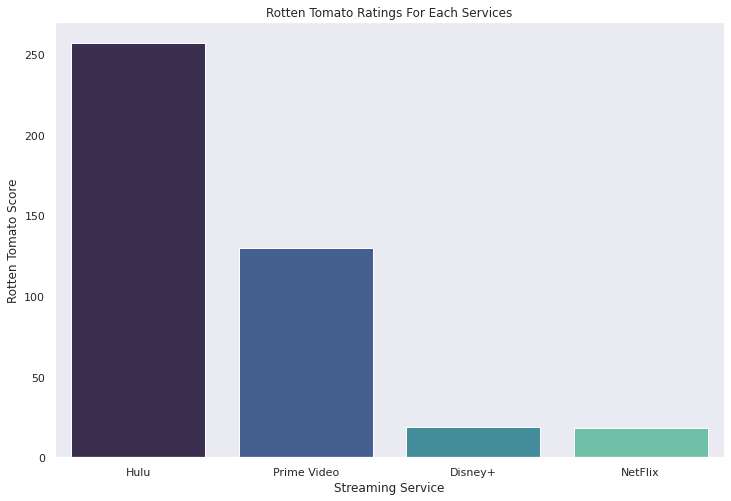

In [143]:
plt.figure(figsize=(12,8))
plt.title('Rotten Tomato Ratings For Each Services')
sns.barplot(x=sorted_rt_score['Streaming Service'],y=sorted_rt_score['Rotten Tomato Score'],palette ='mako')

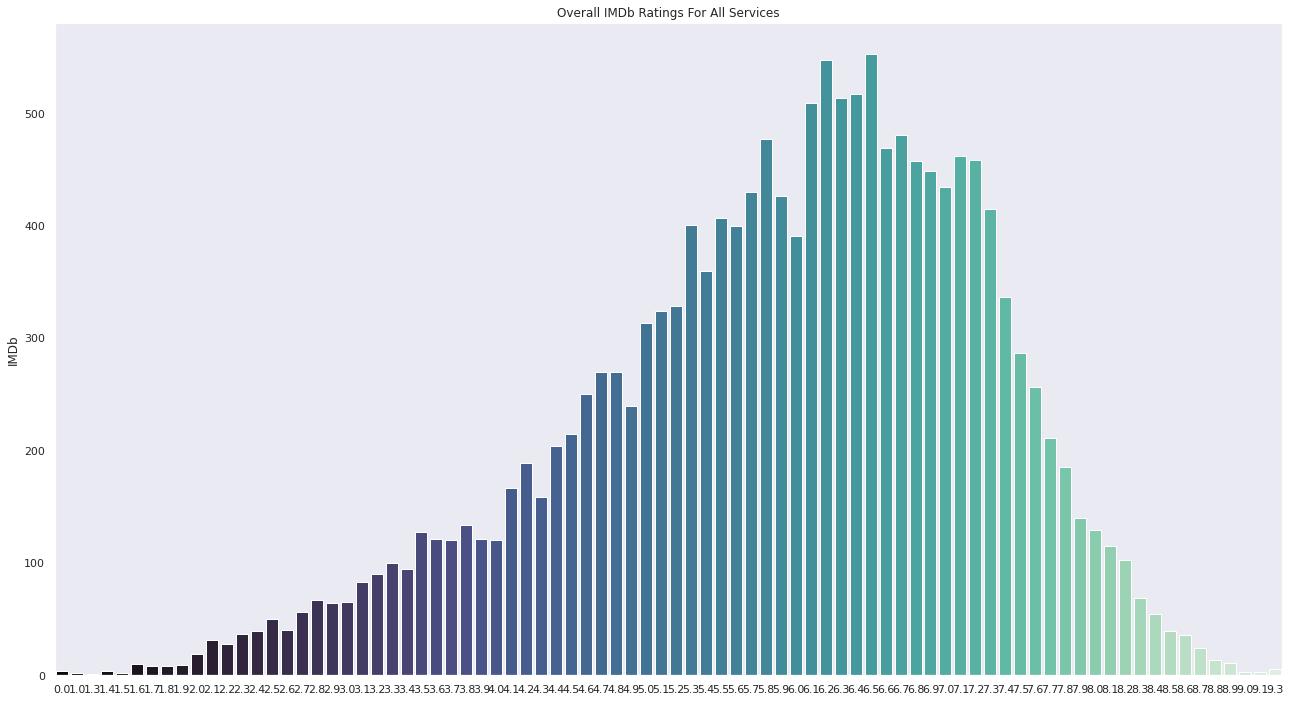

In [159]:
plt.figure(figsize=(22,12))
plt.title('Overall IMDb Ratings For All Services')
sns.barplot(x=data['IMDb'].value_counts().index,y=data['IMDb'].value_counts(),palette ='mako',ci=None)

In [169]:
data.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13.0,8.8,87.0,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18.0,8.7,87.0,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13.0,8.5,84.0,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7.0,8.5,96.0,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18.0,8.8,97.0,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [203]:
data['Runtime'].value_counts()

90.0     971
95.0     489
92.0     434
93.0     422
85.0     408
        ... 
176.0      1
270.0      1
187.0      1
209.0      1
233.0      1
Name: Runtime, Length: 225, dtype: int64

In [210]:
Runtimecount = pd.DataFrame(dict(data['Runtime'].value_counts().sort_values(ascending = False)[:10]).items(),columns = ['Runtime', 'Count'])

In [221]:
asc = Runtimecount.head(10)

In [224]:
asc

,Runtime,Count
0,90.0,971
1,95.0,489
2,92.0,434
3,93.0,422
4,85.0,408
5,89.0,407
6,88.0,406
7,100.0,402
8,91.0,394
9,94.0,383


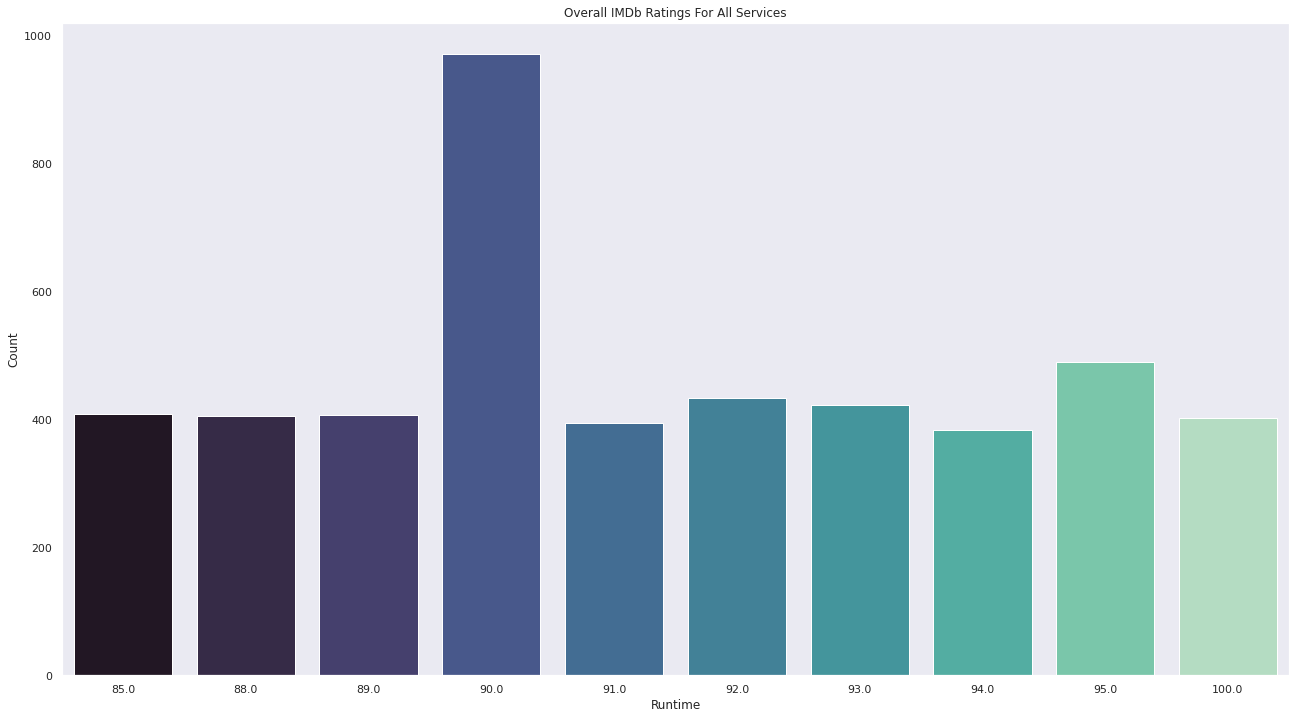

In [226]:
plt.figure(figsize=(22,12))
plt.title('Overall IMDb Ratings For All Services')
sns.barplot(x=asc['Runtime'], y=asc['Count'],palette ='mako')

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   float64
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   float64
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16145 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.9+ MB


In [241]:
data['Directors'] = data['Directors'].astype(str)

In [ ]:
new_data = data[data['Directors'] !=np.nan]

directors_count = dict()
direc_in_data = list(new_data['Directors'])
for xdir in direc_in_data:
    curr_dirs = xdir.split(",")
    for xd in curr_dirs:
        if xd in directors_count.keys():
            directors_count[xd] = directors_count.get(xd) + 1
        else:
            directors_count[xd] = 1

In [250]:
DirCount = pd.DataFrame(directors_count.items(), columns=['Director', 'Count'])
DirCount=DirCount.sort_values(ascending=False, by='Count').head(20)
DirCount

,Director,Count
56,nan,726
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21
